In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
t = np.arange(0, 584)
T = 584 # Synodic periode of Venus
dV = 0.72333902851 # 
dE = 1.0

In [3]:
# maximum elongation
elo_max = np.arcsin(dV/dE)
print("Maximum elongation: ", np.degrees(elo_max), " deg")

# theta at max elongation
theta_elomax = np.pi/2. - elo_max
t_elomax = theta_elomax/(2*np.pi) * T
print("Maximum elongation happened ", t_elomax, " days before and after inferior conjunction")

Maximum elongation:  46.330849401325  deg
Maximum elongation happened  70.84106652673945  days before and after inferior conjunction


In [4]:
# angle at Sun
theta = []
for ti in t:
    theta_i = ti/T*2*np.pi
    if theta_i < np.pi:
        theta.append(theta_i)
    else:
        theta.append(2*np.pi - theta_i)

Text(0, 0.5, '$\\theta$ [deg]')

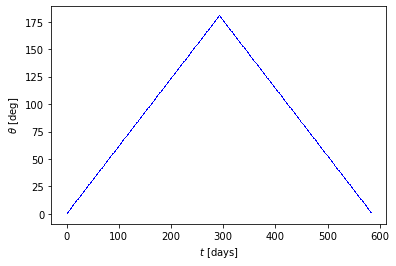

In [5]:
plt.plot(t, np.degrees(theta), 'b,')
plt.xlabel(r"$t$ [days]")
plt.ylabel(r"$\theta$ [deg]")

In [6]:
# Venus-Earth distance
d = np.sqrt(dE*dE + dV*dV - 2*dE*dV*np.cos(theta))

Text(0, 0.5, '$d [au]$')

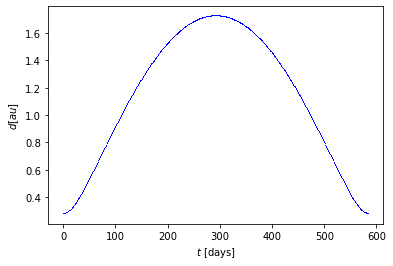

In [7]:
plt.plot(t, d, 'b,')
plt.xlabel(r"$t$ [days]")
plt.ylabel(r"$d [au]$")

In [8]:
# phase angle
# phi = np.arcsin(np.sin(theta_i)/d)
phi = []
for i, theta_i in enumerate(theta):
    phi_i = np.arcsin(np.sin(theta_i)/d[i])
    if theta_i < theta_elomax:
        phi.append(np.pi - phi_i)
    else:
        phi.append(phi_i)

Text(0, 0.5, '$\\phi$ [deg]')

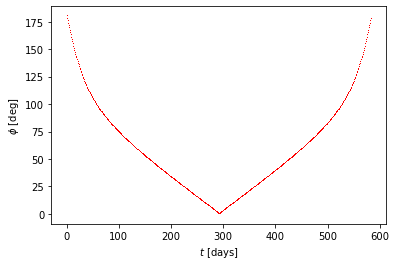

In [9]:
plt.plot(t, np.degrees(phi), 'r,')
plt.xlabel(r"$t$ [days]")
plt.ylabel(r"$\phi$ [deg]")

In [10]:
# phase
q = 0.5*(1 + np.cos(phi))

Text(0, 0.5, '$q$')

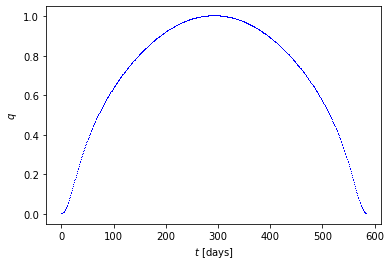

In [11]:
plt.plot(t, q, 'b,')
plt.xlabel(r"$t$ [days]")
plt.ylabel(r"$q$")

In [12]:
# brightness function
E = q/(d*d)

In [13]:
data = np.array([t, theta, d, phi, q, E])
df = pd.DataFrame(data.T, columns=["t", "theta", "d", "phi", "q", "E"])

In [14]:
df.to_csv("venus_brightest.csv")

Text(0, 0.5, 'Relative brightness')

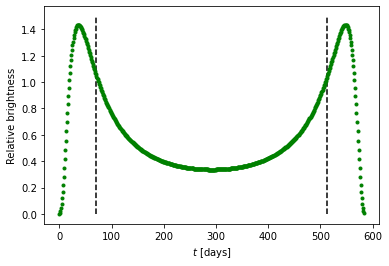

In [15]:
plt.plot(t, E, 'g.')
plt.vlines(t_elomax, 0, 1.5, colors='k', ls='--')
plt.vlines(T-t_elomax, 0, 1.5, colors='k', ls='--')
plt.xlabel(r"$t$ [days]")
plt.ylabel(r"Relative brightness")

In [16]:
# Brightest Venus can be seen at
print("Brightest Venus can be seen at", np.argmax(E), "days before and after the inferior conjunction")
print("OR \n~", np.round(t_elomax-np.argmax(E)), "days before Western maximum elongation and after Eastern maximum elongation")

Brightest Venus can be seen at 36 days before and after the inferior conjunction
OR 
~ 35.0 days before Western maximum elongation and after Eastern maximum elongation
